# BE 485/585</li>
## DATE
## Your First and Last and you can add your photo if you wish
<ul>In this exercise:<br>
<li>Read a BSQ file, then:</li>
    <ul>
    <li>- Plot Histograms</li>
    <li>- Scatter plots </li>
    <li>- Spectral Signature Plots </li>
</ul>

In [1]:
# load necessary library modules 
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

#Here we check to see if our library is where it could be accessed
if "../Library/" not in sys.path:
    sys.path.append("../Library/")
import viplab_lib as vip

In [2]:
# This is a module/function that reads BSQ Data
def BSQ_band_read(filename,bandindex,nrows,ncols,datatype=np.int16):
    
    #do image computations
    bytesize=np.dtype(datatype).itemsize
    pixelsperband=nrows*ncols
    bandsize=pixelsperband*bytesize
    
    if type(bandindex) in (list, np.ndarray):
        isList=True
    else:
      isList=False  
      if (bandindex<0):
          isList=True
          bandindex=np.abs(bandindex)  
          bandindex=np.linspace(0,bandindex-1,num=bandindex)
          print(bandindex)
          
    
    #open the file for reading as binary
    f=open(filename,'rb') 
    
    if(isList==True):
      # Several bands will be read
      nbands= len(bandindex)
      print("nbands=",nbands)    
      data=np.zeros((nrows,ncols,nbands),datatype)
      for i in range(0,nbands):
         f.seek(bandsize*i) 
         band=np.fromfile(f,dtype=datatype, count=pixelsperband)
         data[:,:,i]=band.reshape([nrows,ncols])
              
    else:    
       #Read a single band  
       #jum to start of band
       f.seek(bandsize*bandindex)
        
       #read from file as int16, pixels for second band and assign to bandGREEN
       data=np.fromfile(f,dtype=datatype, count=pixelsperband)
       data=data.reshape([nrows,ncols])
    
    # close the file
    f.close()
    return data

# ends bsq reader function    

# Load the Data

In [3]:
# Main program body

#subset file information
filename=r"./Data/NEON_GreenValley.bsq"

# Number of rows 
nrows=500

# Number of columns 
ncols=500

# Data storage type (defines number of bits)
datatype=np.int16

In [4]:
# Read a RED band
DataRed=BSQ_band_read(filename,48,nrows,ncols)
DataGreen=BSQ_band_read(filename,34,nrows,ncols)
DataBlue=BSQ_band_read(filename,17,nrows,ncols)

# Learn to  understand your big data and know its charactristics 

In [5]:
# Extract image dimension
Num_Rows, Num_Col= np.shape(DataRed)
print('Image width:  ', Num_Rows)
print('Image height: ', Num_Col)
print('Image Max Value: ', np.max(DataRed))
print('Image Min Value: ', np.min(DataRed))
print('Image Min Value: ', np.mean(DataRed))  # Notice the value versus Min and MAx

Image width:   500
Image height:  500
Image Max Value:  15307
Image Min Value:  0
Image Min Value:  1392.179816


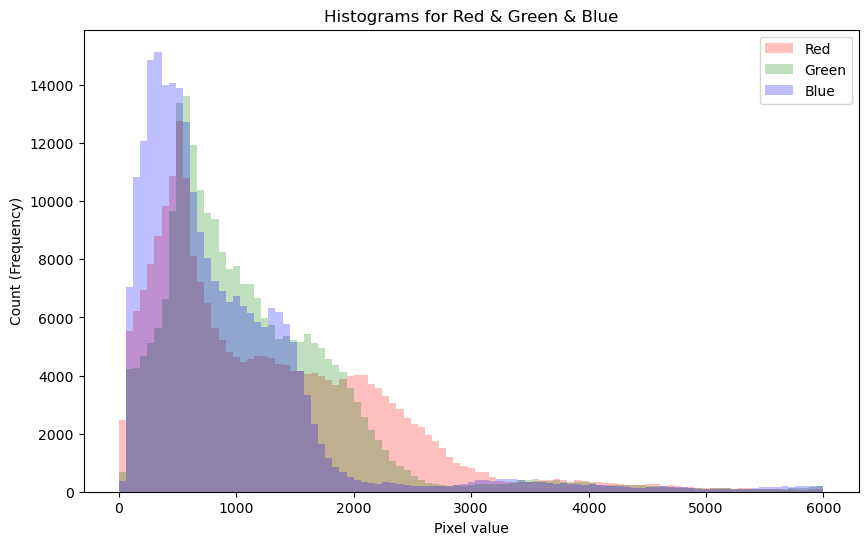

In [15]:
# Create and plot histogram 
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.title('Histograms for Red & Green & Blue')
plt.xlabel('Pixel value')
plt.ylabel('Count (Frequency)')


#Try to understand how we apply color and genrate the historgams. 
# There are other ways to do the same thing
# Histograms are computed based on a bin size (class size) so you can chaneg that
 
bins = np.linspace(0, 6000, 100)  # 100 bins between 0 and 6000 so each is 60 wide

# The ravel() is used to change a 2-dimensional array or a multi-dimensional array into 
# a contiguous flattened 1-D array. The returned array has the same data type as the source array or input array. 

plt.hist(DataRed.ravel(),bins, alpha=0.25, range=(0,6000),color='red',label='Red')
plt.hist(DataGreen.ravel(),bins, alpha=0.25, range=(0,6000),color='green',label='Green')
plt.hist(DataBlue.ravel(),bins, alpha=0.25, range=(0,6000),color='blue',label='Blue')
plt.legend(loc='upper right')
plt.show()

# Now lets plot the correlation between two bands 

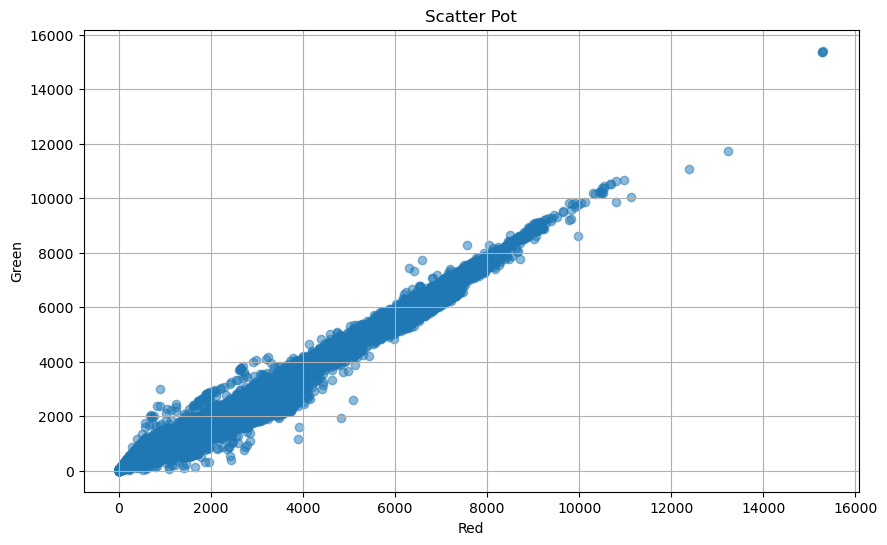

In [16]:
# Create a ScatterPlot between Red and Green bands 
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.title('Scatter Pot')
plt.xlabel('Red')
plt.ylabel('Green')
plt.scatter(DataRed,DataGreen,marker='o',alpha=0.5)
plt.grid()

## <font color="blue"> We will use Machine learning tools here to perform a simple regression analysis 
* This is no different than any other tool for regression analysis. Except to add that Regression is a classical predictive tool </font>
* We will learn how to create a linear regressions with some of the data from these images to learn how they are correlated
* It is up to you to understand the meaning of these correlations

## <font color=red>Import the skleran library linear regression model and import the data </font>

In [17]:
# We now load the linear regression model from the library Sklearn (a machine learning library)

from sklearn import linear_model

################################################ Train-Ordinary Least Square Model  #############################################
ols = linear_model.LinearRegression()

# Before we can use the tool we need to reshape the 2D image into a 1D array to perform the analysis following the classical Y=f(X)
# The reshape call does that by specifying 1 for the 1D and -1 for whatever is needed in terms of the length of the array
X =DataRed[233:].reshape(-1,1)    # Please understand slicing 
y =DataGreen[233:].reshape(-1,1)  # Please understand slicing 

## <font color=red>Train the model and generate it's R2</font>


In [18]:
# Train and generate the model 
model = ols.fit(X,y)
response = model.predict(X)

###################### Evaluate ###############

R2 = model.score(X, y)

###################### Plot ###################

## <font color=red> Plot the data and the model </font>

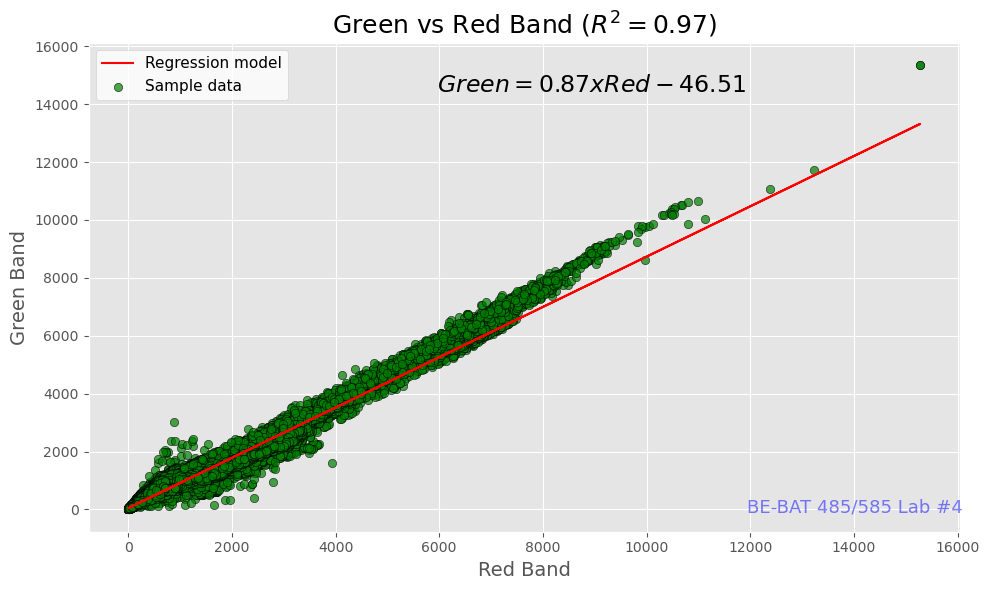

In [19]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 6))

# plot the modled data
ax.plot(X, response, color='r', label='Regression model')

# plot the observations
ax.scatter(X, y, edgecolor='k', facecolor='green', alpha=0.7, label='Sample data')
ax.set_ylabel('Green Band', fontsize=14)
ax.set_xlabel('Red Band', fontsize=14)
# Now add the model to the plot
ax.text(0.4, 0.90, '$Green = %.2f xRed - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)


ax.text(0.88, 0.05, 'BE-BAT 485/585 Lab #4', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Green vs Red Band ($R^2= %.2f$)' % R2, fontsize=18)


# This call tighten the plot and removes any padding or space around it. Useful sometimes
fig.tight_layout()

## Now we will learn how to build spectral signatures. i.e. the behavior of an object across the full spectrum 

## First we need to load the bands labels/wavelengthes from amn external text file <font color=red><NEON_wavelength_values.txt></font>
## These labels will be used for labeling so we know which band is which 

In [20]:
# Read the wavelength values from the textfile
file = open(r'./Data/NEON_wavelength_values.txt','r') 
Xvalues= file.readlines() 
nvalues=len(Xvalues)
#convert text to number (float)
for i in range(0,nvalues):
  Xvalues[i]=float(Xvalues[i]) 

# close text file
file.close

<function TextIOWrapper.close()>

## Read all the bands now - Remember this is a hyperspectral data set

In [21]:
DataAll=BSQ_band_read(filename,-426,nrows,ncols)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

## Pick few pixels/objects and plot their respective spectral signatures 

### Notice how we pick the pixels/objects using Python array Slicing 
### Also notice that we fix the <font color=blue> ROW and COLUMN </font>which define the location and let the bands be free [:] so as to get the spectra

In [22]:
# Define the location and extract their signatures 
Yvalues_Tree=DataAll[35,78,:]

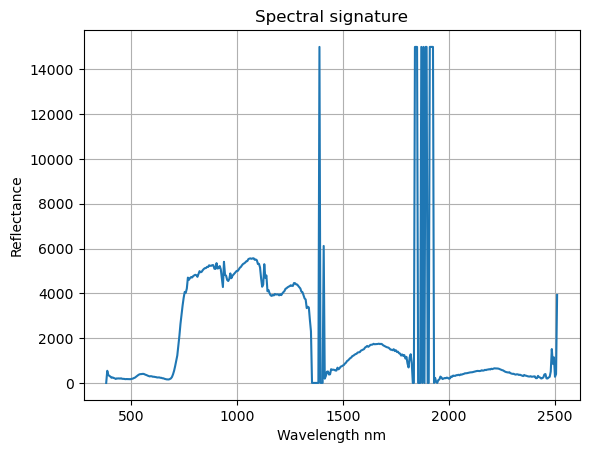

In [24]:
plt.style.use('default')
plt.figure()
plt.title('Spectral signature')
plt.xlabel('Wavelength nm')
plt.ylabel('Reflectance')
plt.plot(Xvalues,Yvalues_Tree)
plt.grid(True)
plt.show()

# <font color="red">Homework - To do </font>
* What information you think the plot is capturing? Explain?
* Create a scatter plot and a correlation between the GREEN and NIR bands 
* Then create/simulate a new GREEN band image using this coerrelation 
* Create a true color image with this fake/simulated band to replace the real green band (so instead of RGB you will  use R-Simulated Green-Blue
* Now Create a spectral signature plots for the following pixels/locations (you pick)
 ** A Vegetated pixel, Asphalt, Soil, Roof, Water,  road, (you will need to identify the Row x Column location)
 ** Add identifying labels to yoru plots

In [151]:
# your code goes heee

In [ ]:
#display a message to know the program ended
print("program ended.")